In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

# Etapa 1 y 2
#### Jhonatan Acalón

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Leer el archivo CSV
df = pd.read_csv("/content/pacientes_urgencias.csv")

In [ ]:
# Mostrar informacion inicial del dataset
print("=== INFORMACION INICIAL DEL DATASET ===")
print(f"Dimensiones: {df.shape}")
print("\nPrimeras 10 filas:")
print(df.head(10))

=== INFORMACION INICIAL DEL DATASET ===
Dimensiones: (80, 10)

Primeras 10 filas:
   ID  Edad  Temperatura  Presion_Sistolica  Presion_Diastolica  \
0   1    50         36.4                124                  55   
1   2    40         36.7                127                  75   
2   3    38         36.3                129                  75   
3   4    12         37.0                122                  86   
4   5    17         37.1                141                  90   
5   6    34         37.4                115                  55   
6   7    34         36.8                118                  62   
7   8    74         38.2                139                  88   
8   9     1         37.3                 91                  98   
9  10    81         36.8                145                  92   

   Frecuencia_Cardiaca  Dolor                 Sintomas  Tiempo_Espera  \
0                  113      9  Dificultad respiratoria             51   
1                  102      8     

In [ ]:
print("\nInformacion general:")
print(df.info())


Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   80 non-null     int64  
 1   Edad                 80 non-null     int64  
 2   Temperatura          80 non-null     float64
 3   Presion_Sistolica    80 non-null     int64  
 4   Presion_Diastolica   80 non-null     int64  
 5   Frecuencia_Cardiaca  80 non-null     int64  
 6   Dolor                80 non-null     int64  
 7   Sintomas             80 non-null     object 
 8   Tiempo_Espera        80 non-null     int64  
 9   Prioridad            80 non-null     object 
dtypes: float64(1), int64(7), object(2)
memory usage: 6.4+ KB
None


In [ ]:
print("\nEstadisticas descriptivas:")
print(df.describe())


Estadisticas descriptivas:
            ID       Edad  Temperatura  Presion_Sistolica  Presion_Diastolica  \
count  80.0000  80.000000    80.000000          80.000000           80.000000   
mean   40.5000  41.625000    36.997500         122.012500           77.275000   
std    23.2379  25.080819     0.656607          19.471819           12.575821   
min     1.0000   1.000000    35.100000          85.000000           55.000000   
25%    20.7500  19.500000    36.600000         107.000000           67.000000   
50%    40.5000  41.000000    37.000000         122.500000           77.000000   
75%    60.2500  60.500000    37.400000         136.000000           88.250000   
max    80.0000  89.000000    38.500000         159.000000           98.000000   

       Frecuencia_Cardiaca      Dolor  Tiempo_Espera  
count            80.000000  80.000000      80.000000  
mean             96.462500   5.450000      92.825000  
std              23.763041   2.699742      53.999478  
min              58.00

In [ ]:
# 2. NORMALIZAR CATEGORIAS DE SINTOMAS
print("\n=== NORMALIZANDO CATEGORIAS DE SINTOMAS ===")

# Mostrar sintomas unicos antes de normalizar
print("Sintomas unicos antes de normalizar:")
print(df["Sintomas"].unique())


=== NORMALIZANDO CATEGORIAS DE SINTOMAS ===
Sintomas unicos antes de normalizar:
['Dificultad respiratoria' 'Fractura' 'Sangrado' 'Dolor toracico' 'Mareos'
 'Nauseas' 'Fiebre persistente' 'Dolor abdominal']


In [ ]:
# Diccionario para normalizar sintomas
mapeo_sintomas = {
    "Dificultad respiratoria": "DIFICULTAD_RESPIRATORIA",
    "Fractura": "FRACTURA",
    "Sangrado": "SANGRADO",
    "Dolor toracico": "DOLOR_TORACICO",
    "Mareos": "MAREO",
    "Nauseas": "NAUSEA",
    "Fiebre persistente": "FIEBRE_PERSISTENTE",
    "Dolor abdominal": "DOLOR_ABDOMINAL"
}

In [ ]:
# Aplicar normalizacion
df["Sintomas"] = df["Sintomas"].replace(mapeo_sintomas)

In [ ]:
print("\nSintomas despues de normalizar:")
print(df["Sintomas"].unique())


Sintomas despues de normalizar:
['DIFICULTAD_RESPIRATORIA' 'FRACTURA' 'SANGRADO' 'DOLOR_TORACICO' 'MAREO'
 'NAUSEA' 'FIEBRE_PERSISTENTE' 'DOLOR_ABDOMINAL']


In [ ]:
# 3. MANEJAR VALORES FALTANTES
print("\n=== MANEJO DE VALORES FALTANTES ===")

# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


=== MANEJO DE VALORES FALTANTES ===
Valores nulos por columna:
ID                     0
Edad                   0
Temperatura            0
Presion_Sistolica      0
Presion_Diastolica     0
Frecuencia_Cardiaca    0
Dolor                  0
Sintomas               0
Tiempo_Espera          0
Prioridad              0
dtype: int64


In [ ]:
# Si existieran valores nulos en el dataset se manejarian de la siguiente forma:
# Para variables numericas: llenar con la mediana
# Para variables categoricas: llenar con la moda

numeric_cols = [col for col in df.columns if df[col].dtype in ["int64", "float64"]]
categorical_cols = [col for col in df.columns if df[col].dtype == "object"]
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Valores nulos en {col} llenados con mediana: {df[col].median()}")
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Valores nulos en {col} llenados con moda: {df[col].mode()[0]}")

In [ ]:
# 4. VERIFICAR Y ESTANDARIZAR UNIDADES
print("\n=== VERIFICACION DE RANGOS MEDICOS ===")

# Definir rangos medicos esperados
normal_ranges = {
    "Temperatura": (35.0, 42.0),  # °C
    "Presion_Sistolica": (70, 200),  # mmHg
    "Presion_Diastolica": (40, 120),  # mmHg
    "Frecuencia_Cardiaca": (40, 180),  # lpm
    "Dolor": (1, 10),  # escala
    "Edad": (0, 110),  # años
    "Tiempo_Espera": (0, 200)  # minutos
}

for col, (min_val, max_val) in normal_ranges.items():
    outliers = df[(df[col] < min_val) | (df[col] > max_val)]
    if not outliers.empty:
        print(f"Valores atipicos en {col}: {len(outliers)} registros")
        print(outliers[[col]])
    else:
        print(f"No se encontraron valores atipicos en {col}")


=== VERIFICACION DE RANGOS MEDICOS ===
No se encontraron valores atipicos en Temperatura
No se encontraron valores atipicos en Presion_Sistolica
No se encontraron valores atipicos en Presion_Diastolica
No se encontraron valores atipicos en Frecuencia_Cardiaca
No se encontraron valores atipicos en Dolor
No se encontraron valores atipicos en Edad
No se encontraron valores atipicos en Tiempo_Espera


In [ ]:
# 5. ANALISIS INICIAL DE CALIDAD DE DATOS
print("\n=== ANALISIS DE CALIDAD DE DATOS ===")

# Verificar distribucion de prioridades
print("Distribucion de prioridades:")
print(df["Prioridad"].value_counts())

# Verificar distribucion de sintomas
print("\nDistribucion de sintomas:")
print(df["Sintomas"].value_counts())



=== ANALISIS DE CALIDAD DE DATOS ===
Distribucion de prioridades:
Prioridad
Critica    33
Alta       29
Media      11
Baja        7
Name: count, dtype: int64

Distribucion de sintomas:
Sintomas
SANGRADO                   14
NAUSEA                     14
FIEBRE_PERSISTENTE         13
FRACTURA                   11
DOLOR_TORACICO              8
MAREO                       7
DOLOR_ABDOMINAL             7
DIFICULTAD_RESPIRATORIA     6
Name: count, dtype: int64


In [ ]:
# 6. CREAR VARIABLES DERIVADAS UTILES PARA EL ANALISIS
print("\n=== CREANDO VARIABLES DERIVADAS ===")

# Clasificacion por grupos de edad
def clasificar_edad(edad):
    if edad < 12:
        return "Niño"
    elif edad < 18:
        return "Adolescente"
    elif edad < 60:
        return "Adulto"
    else:
        return "Adulto Mayor"

df["Grupo_Edad"] = df["Edad"].apply(clasificar_edad)

# Clasificacion de presion arterial
def clasificar_presion(sistolica, diastolica):
    if sistolica < 90 or diastolica < 60:
        return "Hipotensión"
    elif sistolica < 120 and diastolica < 80:
        return "Normal"
    elif sistolica < 130 and diastolica < 80:
        return "Elevada"
    elif sistolica < 140 or diastolica < 90:
        return "Hipertensión Estadio 1"
    else:
        return "Hipertensión Estadio 2"

df["Categoria_Presion"] = df.apply(lambda row: clasificar_presion(row["Presion_Sistolica"], row["Presion_Diastolica"]), axis=1)

print("Variables derivadas creadas:")
print(f"- Grupo_Edad: {df['Grupo_Edad'].unique()}")
print(f"- Categoria_Presion: {df['Categoria_Presion'].unique()}")


=== CREANDO VARIABLES DERIVADAS ===
Variables derivadas creadas:
- Grupo_Edad: ['Adulto' 'Adolescente' 'Adulto Mayor' 'Niño']
- Categoria_Presion: ['Hipotensión' 'Elevada' 'Hipertensión Estadio 1' 'Hipertensión Estadio 2'
 'Normal']


In [ ]:
# 7. GUARDAR DATASET LIMPIO
print("\n=== GUARDANDO DATASET LIMPIO ===")

# Guardar dataset limpio
df.to_csv("datos_limpios.csv", index=False)

# Verificar que se guardo correctamente
df_limpio = pd.read_csv("datos_limpios.csv")
print(f"Dataset limpio guardado: {df_limpio.shape}")


=== GUARDANDO DATASET LIMPIO ===
Dataset limpio guardado: (80, 12)


In [ ]:
# 8. GENERAR REPORTE FINAL DE PREPROCESAMIENTO
print("\n" + "="*50)
print("REPORTE FINAL DE PREPROCESAMIENTO")
print("="*50)

print(f"Dataset original: {df.shape}")
print(f"Dataset limpio: {df_limpio.shape}")

print("\nVariables en el dataset limpio:")
for i, col in enumerate(df_limpio.columns, 1):
    print(f"  {i}. {col}")

print(f"\nDistribucion de prioridades:")
prioridades = df_limpio['Prioridad'].value_counts()
for prio, count in prioridades.items():
    print(f"  {prio}: {count} pacientes ({count/len(df_limpio)*100:.1f}%)")

print(f"\nSintomas mas comunes:")
sintomas = df_limpio["Sintomas"].value_counts().head(5)
for sintoma, count in sintomas.items():
    print(f"  {sintoma}: {count} pacientes")

print(f"\nDistribucion por grupos de edad:")
grupos_edad = df_limpio["Grupo_Edad"].value_counts()
for grupo, count in grupos_edad.items():
    print(f"  {grupo}: {count} pacientes")


REPORTE FINAL DE PREPROCESAMIENTO
Dataset original: (80, 12)
Dataset limpio: (80, 12)

Variables en el dataset limpio:
  1. ID
  2. Edad
  3. Temperatura
  4. Presion_Sistolica
  5. Presion_Diastolica
  6. Frecuencia_Cardiaca
  7. Dolor
  8. Sintomas
  9. Tiempo_Espera
  10. Prioridad
  11. Grupo_Edad
  12. Categoria_Presion

Distribucion de prioridades:
  Critica: 33 pacientes (41.2%)
  Alta: 29 pacientes (36.2%)
  Media: 11 pacientes (13.8%)
  Baja: 7 pacientes (8.8%)

Sintomas mas comunes:
  SANGRADO: 14 pacientes
  NAUSEA: 14 pacientes
  FIEBRE_PERSISTENTE: 13 pacientes
  FRACTURA: 11 pacientes
  DOLOR_TORACICO: 8 pacientes

Distribucion por grupos de edad:
  Adulto: 40 pacientes
  Adulto Mayor: 21 pacientes
  Niño: 13 pacientes
  Adolescente: 6 pacientes


# Etapa 3
#### Miguel Tubac

In [ ]:
# =============================
# 1. Cargar los datos
# =============================
# Se lee el archivo
df = pd.read_csv("datos_limpios.csv")
df.head()

,ID,Edad,Temperatura,Presion_Sistolica,Presion_Diastolica,Frecuencia_Cardiaca,Dolor,Sintomas,Tiempo_Espera,Prioridad,Grupo_Edad,Categoria_Presion
0,1,50,36.4,124,55,113,9,DIFICULTAD_RESPIRATORIA,51,Critica,Adulto,Hipotensión
1,2,40,36.7,127,75,102,8,FRACTURA,139,Alta,Adulto,Elevada
2,3,38,36.3,129,75,118,1,SANGRADO,106,Critica,Adulto,Elevada
3,4,12,37.0,122,86,86,1,DOLOR_TORACICO,114,Critica,Adolescente,Hipertensión Estadio 1
4,5,17,37.1,141,90,87,3,MAREO,39,Baja,Adolescente,Hipertensión Estadio 2


In [ ]:
# =============================
# 2. Estadisticas basicas
# =============================

# Distribución de prioridades
print("\nDistribución de prioridades:")
print(df["Prioridad"].value_counts())

# Promedio de signos vitales
print("\nPromedio de signos vitales:")
print(df[["Temperatura", "Presion_Sistolica", "Presion_Diastolica", "Frecuencia_Cardiaca"]].mean())


Distribución de prioridades:
Prioridad
Critica    33
Alta       29
Media      11
Baja        7
Name: count, dtype: int64

Promedio de signos vitales:
Temperatura             36.9975
Presion_Sistolica      122.0125
Presion_Diastolica      77.2750
Frecuencia_Cardiaca     96.4625
dtype: float64


In [ ]:
# =============================
# 3. Identificar correlaciones
# =============================

# Convertir Prioridad a numeros para correlacion
df["Prioridad_Num"] = df["Prioridad"].astype("category").cat.codes

# Calcular correlaciones
corr = df.corr(numeric_only=True)

print("\nCorrelaciones con Prioridad:")
print(corr["Prioridad_Num"].sort_values(ascending=False))


Correlaciones con Prioridad:
Prioridad_Num          1.000000
Frecuencia_Cardiaca    0.295280
Temperatura            0.224926
Presion_Sistolica      0.190524
Edad                  -0.080050
Presion_Diastolica    -0.091623
Dolor                 -0.108439
ID                    -0.136767
Tiempo_Espera         -0.481909
Name: Prioridad_Num, dtype: float64


### Interpretacion:

- Frecuencia cardíaca (0.29): a mayor frecuencia, tiende a ser mayor la prioridad (más urgente).

- Temperatura (0.22) y Presión sistólica (0.19): leves tendencias positivas → valores más altos tienden a asociarse con prioridades más graves.

- Tiempo de espera (-0.48): cuanto mayor es la prioridad, menos espera el paciente (tiene sentido en urgencias).

- Los demás (Edad, Dolor, etc.) no tienen una relación fuerte con la prioridad en tus datos.

### Generar gráficas
Distribución de urgencias.

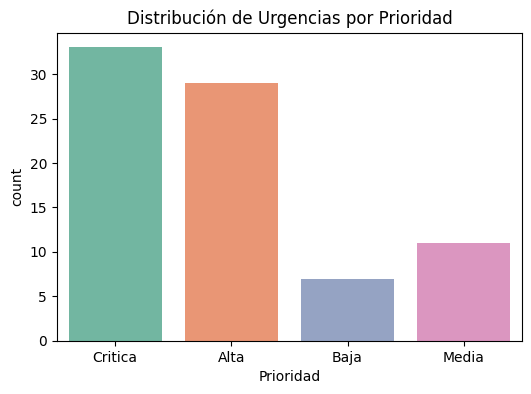

In [ ]:
# =============================
# 4. Graficas
# =============================

# 4.1 Distribucion de urgencias (Prioridad)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Prioridad", hue="Prioridad", palette="Set2", legend=False)
plt.title("Distribución de Urgencias por Prioridad")
plt.show()

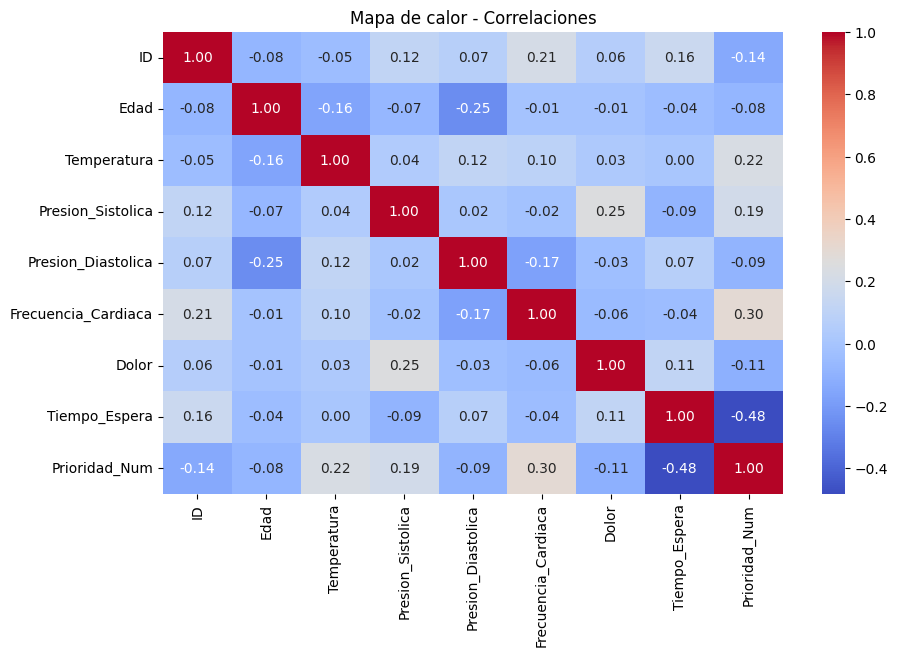

In [ ]:
# 4.2 Heatmap de correlación
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor - Correlaciones")
plt.show()

### Datos:
- Cada celda muestra un número entre -1 y 1:

- 1.00 (rojo fuerte) → correlación positiva perfecta (cuando una sube, la otra también).

- -1.00 (azul fuerte) → correlación negativa perfecta (cuando una sube, la otra baja).

- 0 (blanco) → no hay relación lineal clara.

- annot=True hace que aparezcan los valores encima de cada celda.

- cmap="coolwarm" define la escala de colores (rojo para positivo, azul para negativo).



### Interpretacion de la columna Prioridad_Num:

- Frecuencia_Cardiaca = 0.30 → moderada correlación positiva. A más alta la frecuencia, más crítica tiende a ser la prioridad.

- Temperatura = 0.22 y Presion_Sistolica = 0.19 → leves correlaciones positivas.

- Tiempo_Espera = -0.48 → correlación negativa más fuerte: los pacientes con prioridad más alta suelen esperar menos.

- Edad, Dolor, etc. están cerca de 0 → casi no aportan relación lineal con la prioridad.

Gráficos comparativos (Presión Sistólica por Grupo de Prioridad).

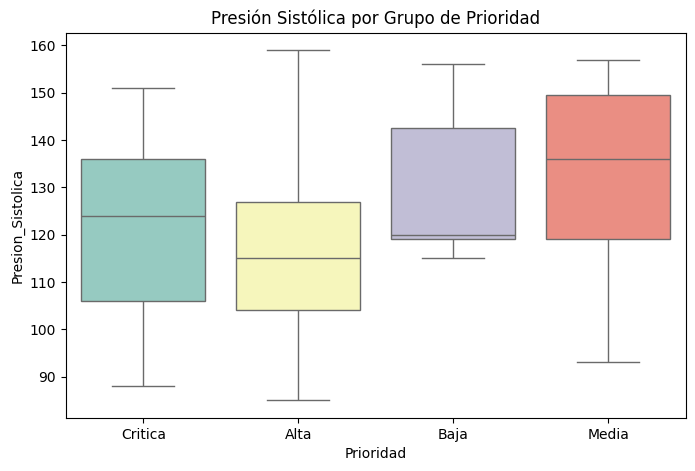

In [ ]:
# 4.3 Gráficos comparativos (Presión Sistólica por Grupo de Prioridad)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Prioridad", hue = "Prioridad", y="Presion_Sistolica", palette="Set3", legend=False)
plt.title("Presión Sistólica por Grupo de Prioridad")
plt.show()

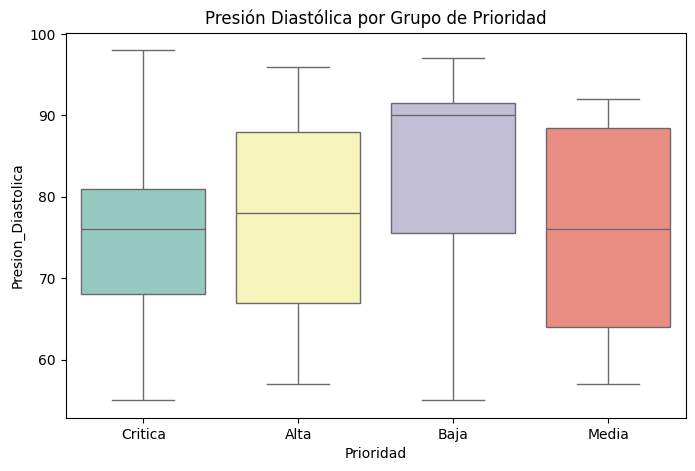

In [ ]:
# Gráficos comparativos (Presión Diastólica por Grupo de Prioridad)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Prioridad", hue="Prioridad", y="Presion_Diastolica", palette="Set3", legend=False)
plt.title("Presión Diastólica por Grupo de Prioridad")
plt.show()

# Etapa 4
#### Dany de León y Deyby Cotom


In [ ]:
from tkinter import messagebox

"""Algoritmo de Triage basado en múltiples parámetros clínicos."""
"""Riesgo Alto se le suman 2 puntos, Riesgo Medio 1 punto, Riesgo Bajo 0 puntos."""

def prioridad_edad(edad):
    """Devuelve el puntaje de riesgo por edad."""
    if edad >= 65 or edad <= 1:
        return 2
    elif 50 <= edad < 65:
        return 1
    return 0

def prioridad_temperatura(temp):
    """Devuelve el puntaje de riesgo por temperatura."""
    if temp <= 35.5 or temp >= 39:
        return 2
    elif 35.5 < temp <= 36.5 or 37.9 <= temp < 39:
        return 1
    return 0

def prioridad_presion_sistolica(pa_s):
    """Devuelve el puntaje de riesgo por presión sistólica."""
    if pa_s <= 75 or pa_s >= 160:
        return 2
    elif 75 < pa_s <= 89 or 141 <= pa_s < 160:
        return 1
    return 0

def prioridad_presion_diastolica(pa_d):
    """Devuelve el puntaje de riesgo por presión diastólica."""
    if pa_d <= 50 or pa_d >= 110:
        return 2
    elif 50 < pa_d <= 59 or 89 <= pa_d < 110:
        return 1
    return 0

def prioridad_frecuencia_cardiaca(fc):
    """Devuelve el puntaje de riesgo por frecuencia cardiaca."""
    if fc <= 40 or fc >= 140:
        return 2
    elif 41 <= fc <= 59 or 99 <= fc <= 139:
        return 1
    return 0

def prioridad_sintomas(sintomas):
    """Devuelve el puntaje de riesgo según síntomas críticos."""
    sintomas_criticos = [
        "dificultad respiratoria", "sangrado", "fractura", "dolor toracico",
        "fiebre_persistente", "dolor_abdominal"
    ]
    if any(s.lower() in sintomas.lower() for s in sintomas_criticos):
        return 2
    elif sintomas:
        return 1
    return 0

def prioridad_tiempo_espera(tiempo):
    """Devuelve el puntaje de riesgo por tiempo de espera."""
    if tiempo >= 90:
        return 1
    return 0

def clasificar_prioridad(entry_edad, entry_temp, entry_pa_s, entry_pa_d, entry_fc, entry_sintomas="", entry_tiempo=0):
    try:
        edad = int(entry_edad.get())
        temp = float(entry_temp.get())
        pa_s = int(entry_pa_s.get())
        pa_d = int(entry_pa_d.get())
        fc = int(entry_fc.get())
        sintomas = entry_sintomas.strip()
        tiempo = int(entry_tiempo) if entry_tiempo else 0

        # Puntajes individuales
        p_edad = prioridad_edad(edad)
        p_temp = prioridad_temperatura(temp)
        p_pa_s = prioridad_presion_sistolica(pa_s)
        p_pa_d = prioridad_presion_diastolica(pa_d)
        p_fc = prioridad_frecuencia_cardiaca(fc)
        p_sintomas = prioridad_sintomas(sintomas)
        p_tiempo = prioridad_tiempo_espera(tiempo)

        puntaje_total = p_edad + p_temp + p_pa_s + p_pa_d + p_fc + p_sintomas + p_tiempo

        """Riesgo ALTO si puntaje >=5, MEDIO si 3-4, BAJO si <3."""
        if puntaje_total >= 5:
            prioridad = "ALTA"
        elif puntaje_total >= 3:
            prioridad = "MEDIA"
        else:
            prioridad = "BAJA"

        detalles = {
            "Detalle Riesgos:": "",
            "Edad": p_edad,
            "Temperatura": p_temp,
            "Presion Sistólica": p_pa_s,
            "Presion Diastólica": p_pa_d,
            "Frecuencia Cardiaca": p_fc,
            "Síntomas": p_sintomas,
            "Tiempo Espera": p_tiempo
        }

        return prioridad, puntaje_total, detalles

    except ValueError:
        messagebox.showerror("Error", "Por favor ingrese valores válidos.")
        return None, 0, {}

In [ ]:
# Versión sin ventana gráfica, solo texto
print("=== Sistema de Triage ===")
nombre = input("Ingrese el nombre del paciente: ")
edad = input("Ingrese la edad: ")
sintomas = input("Ingrese los síntomas: ")

print("\n--- Información registrada ---")
print(f"Nombre: {nombre}")
print(f"Edad: {edad}")
print(f"Síntomas: {sintomas}")


=== Sistema de Triage ===
